In [1]:
## import essential libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df1 = pd.read_csv('D:\\Datasets\\banking marketing\\test.csv')
df1.shape

(13564, 17)

In [3]:
## collecting training dataset

In [4]:
df = pd.read_csv('D:\\Datasets\\banking marketing\\train.csv')

In [5]:
## shape of dataset 

In [6]:
df.shape

(31647, 18)

In [7]:
## head of Dataset

In [8]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
ID            31647 non-null int64
age           31647 non-null int64
job           31647 non-null object
marital       31647 non-null object
education     31647 non-null object
default       31647 non-null object
balance       31647 non-null int64
housing       31647 non-null object
loan          31647 non-null object
contact       31647 non-null object
day           31647 non-null int64
month         31647 non-null object
duration      31647 non-null int64
campaign      31647 non-null int64
pdays         31647 non-null int64
previous      31647 non-null int64
poutcome      31647 non-null object
subscribed    31647 non-null object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [10]:
## Column 'ID' of dataset just redundant for model so let's drop it first 

In [11]:
df.drop(labels=['ID', 'poutcome', 'day', 'month'], axis=1, inplace=True)

In [12]:
## visualizing the dataset

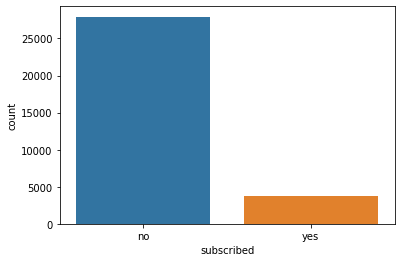

In [13]:
## visualize how many subscribes or not 
sns.countplot(x='subscribed', data=df)

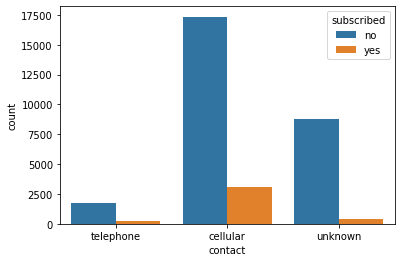

In [14]:
sns.countplot(x='contact', hue='subscribed', data=df)

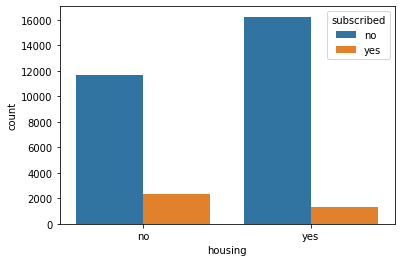

In [15]:
sns.countplot(x='housing', hue='subscribed', data=df)

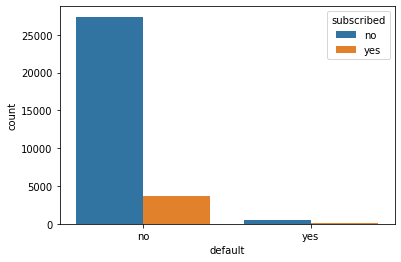

In [16]:
sns.countplot(x='default', hue='subscribed', data=df)

In [204]:
## statistical description of Dataset

In [205]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [206]:
## draw boxplot of dataset

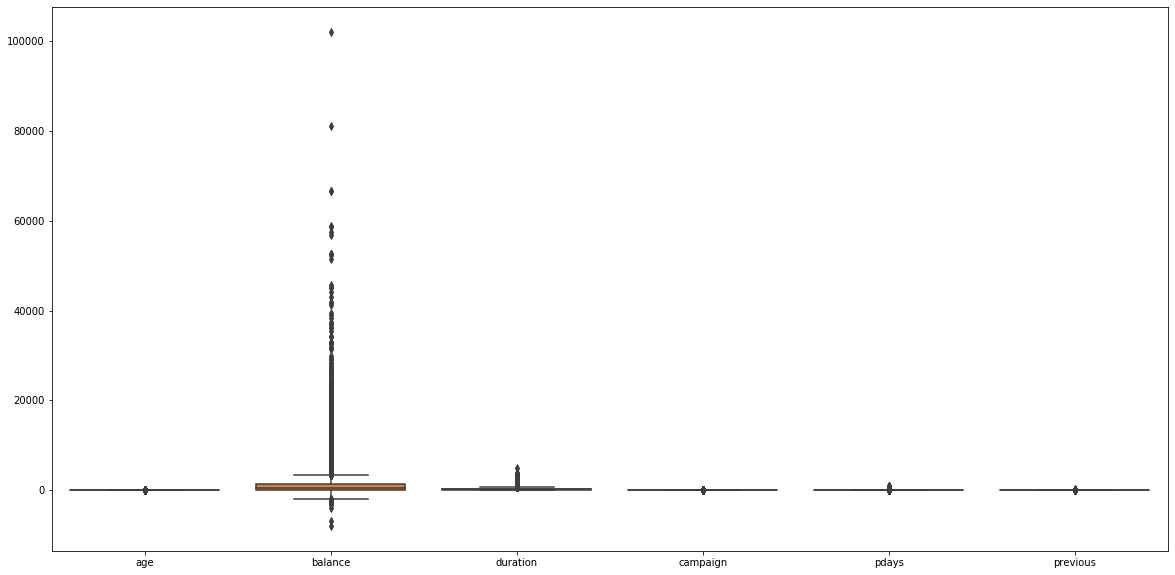

In [207]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [208]:
## use LabelEncoder() to encode the object type columns of data set

In [210]:
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['marital'] = le.fit_transform(df['marital'])
df['pdays'] = df[df['pdays'] < 0] ['pdays'] = 0
df['balance'] = df[df['balance'] < 0] ['balance'] = 0

In [211]:
## split out the dataset into dependent and independent feature.

In [212]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [213]:
## call SelectKBest() for Selecting features according to their p-value

In [214]:
s_b = SelectKBest(score_func=chi2, k='all')

In [215]:
s_b.fit(x,y)

SelectKBest(k='all', score_func=<function chi2 at 0x000001CD0C7447B8>)

In [216]:
## making a dataframe to visualize the column feature with their p-value 

In [217]:
ar = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(s_b.scores_)],axis=1, ignore_index=True).values
ar

array([['age', 52.521904874148206],
       ['job', 118.4403751704563],
       ['marital', 21.19020337413385],
       ['education', 63.25885875978216],
       ['default', 12.63402089380482],
       ['balance', nan],
       ['housing', 279.950347867549],
       ['loan', 138.47465495154432],
       ['contact', 894.2549804688941],
       ['duration', 1231813.3864208008],
       ['campaign', 553.0872722762322],
       ['pdays', nan],
       ['previous', 2509.020029063322]], dtype=object)

In [218]:
# plt.figure(figsize=(16,9))
# plt.plot(ar[:,0], ar[:,1])

In [219]:
## drop the column which have low p-value

In [220]:
x.drop(labels=['age', 'marital', 'education', 'default', 'balance', 'pdays'], axis=1, inplace=True)

In [227]:
## column name of final dataset 

In [1]:
columns = x.columns
columns

NameError: name 'x' is not defined

In [231]:
## call train_test_split for splittling dataset into training and testing

In [233]:
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.85, random_state = 0)

In [221]:
## call the decision tree classifier

In [222]:
classifier = DecisionTreeClassifier(criterion='entropy', )

In [234]:
classifier.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [235]:
y_pred = classifier.predict(test_x)

In [238]:
confusion_matrix(test_y, y_pred)

array([[3803,  360],
       [ 372,  213]], dtype=int64)

In [241]:
accuracy_score(test_y, y_pred)

0.8458298230834035

In [256]:
y_proba = classifier.predict_proba(test_x)

In [247]:
plt.figure(figsize=(100,150),dpi=200)

<Figure size 20000x30000 with 0 Axes>

<Figure size 20000x30000 with 0 Axes>

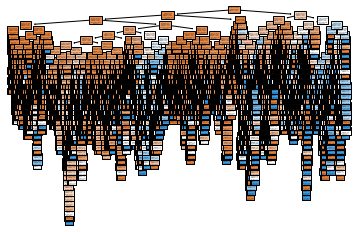

In [249]:
plot_tree(decision_tree=classifier, filled=True, rotate=True, feature_names=columns, class_names=y.unique())
plt.savefig('bank_tree')

In [260]:
from sklearn.externals.six import StringIO
import  pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.248952 to fit



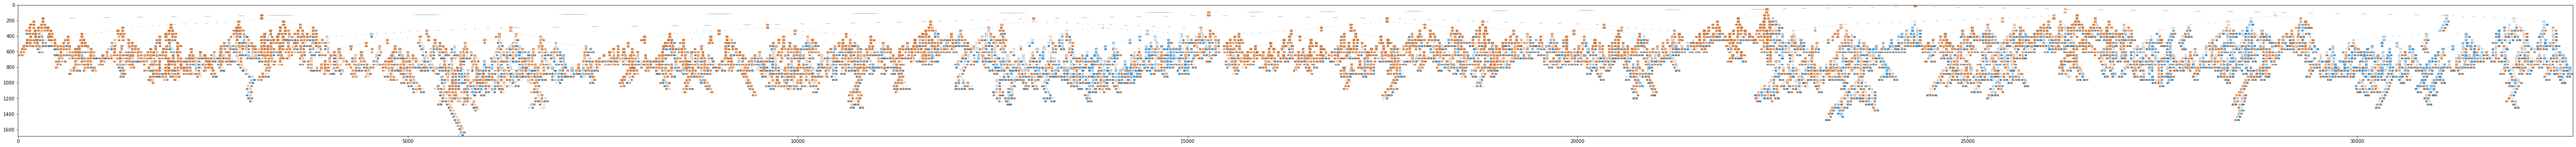

In [262]:
out_data = StringIO()
filename = 'bank_tree2.png'
featureNames = x.columns
targetNames = y.unique().tolist()

out = tree.export_graphviz(classifier, out_file=out_data, feature_names=featureNames, class_names=np.unique(train_y), filled=True,
                          special_characters=True, rotate=False)
graph =pydotplus.graph_from_dot_data(out_data.getvalue())

graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize = (100, 200))
plt.imshow(img)